# Анализ чувствительности в задачах линейного программирования

## Постановка задачи

Фабрика производит три вида продукции: П1, П2 и П3. 

Известна цена на продукцию для распространителей и приблизительный спрос на каждый из видов продукции в неделю (см. Таблицу 1). 

Процессы производства продукции разных видов имеют отличия. На фабрике есть три цеха: Ц1, Ц2 и Ц3. Для производства продукции П1 необходимы только технологические операции, производимые цехом Ц1, для П2 – Ц1 и Ц3, для производства П3 – необходима полная технологическая цепочка, включающая обработку во всех трех цехах. 

В цехах Ц1 и Ц2 продукция разных видов обрабатывается одинаково, и известна общая производительность этих цехов в единицах обработанной продукции в неделю, то в цехе Ц3 предполагается ручная обработка (см. Таблицу 2). 

Из всех видов материалов, используемых при производстве продукции, ограниченным является только один, поставки его в неделю и потребности для каждого из видов продукции приведены в таблице 3. 

Необходимо составить производственный план на неделю, максимизирующий выручку от реализации продукции.

Таблица 1 - Характеристики продукции

| Вид продукции | Цена, руб. | Спрос, шт. в неделю |
|---------------|------------|---------------------|
| П1            | 1200       | 35                  |
| П2            | 2500       | 25                  |
| П3            | 1400       | 30                  |

Таблица 2 - Производительность цехов

| Ц1, шт. в неделю | Ц2, шт. в неделю | Ц3, часов (П2/П3/Общий фонд) |
|------------------|------------------|------------------------------|
| 40               | 20               | 8/2/80                       |

Таблица 3 - Материалы

| Поставки в неделю, кг | На ед. продукта  П1, кг | На ед. продукта  П2, кг | На ед. продукта  П3, кг |
|-----------------------|-------------------------|-------------------------|-------------------------|
| 50                    | 0,8                     | 0,6                     | 0,7                     |

(для генерации таблиц в Markdown можно использовать, например: https://www.tablesgenerator.com/markdown_tables) 

## Формальная постановка задачи

Пусть $x_i$ - количество единиц продукции i-того вида, которое необходимо произвести за неделю ($i \in {1, 2, 3}$). 

Целевая функция и ограничения:
$$
1200x_1 + 2500x_2 + 1400x_3 \rightarrow max \\
x_1 + x_2 + x_3 \leq 40 \\
x_3 \leq 20 \\
8x_2 + 2x_3 \leq 80 \\
x_1 \leq 35 \\
x_2 \leq 25 \\
x_3 \leq 30 \\
0.8x_1 + 0.6x_2 + 0.7x_3 \leq 50 \\
x_{1,2,3} \geq 0
$$

Табличное представление:

|  * | x1   | x2   | x3   | Неравенство | b   |
|----|------|------|------|-------------|-----|
| с  | 1200 | 2500 | 1400 | -           | max |
| y1 | 1    | 1    | 1    | <=          | 40  |
| y2 | 0    | 0    | 1    | <=          | 20  |
| y3 | 0    | 8    | 2    | <=          | 80  |
| y4 | 1    | 0    | 0    | <=          | 35  |
| y5 | 0    | 1    | 0    | <=          | 25  |
| y6 | 0    | 0    | 1    | <=          | 30  |
| y7 | 0,8  | 0,6  | 0,7  | <=          | 50  |



In [1]:
from cvxopt import matrix, solvers

c = matrix([-1200., -2500., -1400.])       # Целевая функция (минусы, потому что решаем задачу максимизации)
G = matrix([[  1,   1,   1],                   # Коэффициенты при ограничениях-неравенствах (вида <=)  
            [  0,   0,   1],
            [  0,   8,   2],
            [  1,   0,   0],
            [  0,   1,   0],
            [  0,   0,   1],
            [0.8, 0.6, 0.7],
            [ -1,   0,   0],                   # Неотрицательность переменных (x_i >= 0)
            [  0,  -1,   0],                   # Поскольку в матрице G должны быть коэффициенты перед неравенствами вида <=
            [  0,   0,  -1]], tc='d')          # домножаем на -1:    x_i >= 0   <==>   -x_i <= 0
            
h = matrix([40, 20, 80, 35, 25, 30, 50, 0, 0, 0], tc='d')   # Вектор правых частей ограничений (свободных членов)


### Решение с помощью GLPK (через интерфейс Python - CVXOPT)


![helper](https://cvxopt.org/userguide/_images/math/1a46f87937c463caee0344c11e4563de96c4cb12.png "Подсказка по использованию CVXOPT")


In [3]:
solution = solvers.lp(c, G.T, h, solver='glpk')

print('Status:', solution['status'])
print('Objective:', solution['primal objective'])
print('x = \n', solution['x'])


Status: optimal
Objective: -61000.0
x = 
 [ 3.00e+01]
[ 1.00e+01]
[ 0.00e+00]



In [7]:
# Для анализа чувствительности нужны значения двойственных переменных 
# (в данном случае, только z (потому что нет ограничений-равенств), иначе еще y)

# Теневые цены - это значения в векторе, соответствующие "основным" ограничениям задачи
# Приведенные цены - значения, соответствующие ограничению "неотрицательности" переменных

print(solution['z'])


[ 1.20e+03]
[-0.00e+00]
[ 1.62e+02]
[-0.00e+00]
[-0.00e+00]
[-0.00e+00]
[-0.00e+00]
[-0.00e+00]
[-0.00e+00]
[ 1.25e+02]



### Исследование теневых цен

In [42]:
# Исследование интервала осуществимости

dh = matrix([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]);     # приращение к вектору правых частей

solution1 = solvers.lp(c, G.T, h + dh, solver='glpk')

print('Status:', solution1['status'])
print('Objective:', -solution1['primal objective'], 'delta:', -solution1['primal objective']+solution['primal objective'])
print(solution1['x'])

Status: optimal
Objective: 62200.0 delta: 1200.0
[ 3.10e+01]
[ 1.00e+01]
[ 0.00e+00]



In [49]:
prev_z = -solution['primal objective']
a = 1
while (True):
    solution_i = solvers.lp(c, G.T, h + dh*a, solver='glpk')
    if solution_i['status'] != 'optimal':
        print('Couldn''t find a solution')
        break
    new_z = -solution_i['primal objective']
    delta_z = new_z - prev_z
    print('Increment %d: obj=%.2f delta=%.2f' % (a, new_z, delta_z))
    if abs(delta_z - 1200) > 1e-6:
        print('Basis changed at increment %d' % (a,))
        break
    prev_z = new_z
    a = a + 1


Increment 1: obj=62200.00 delta=1200.00
Increment 2: obj=63400.00 delta=1200.00
Increment 3: obj=64600.00 delta=1200.00
Increment 4: obj=65800.00 delta=1200.00
Increment 5: obj=67000.00 delta=1200.00
Increment 6: obj=68033.33 delta=1033.33
Basis changed at increment 6


### Исследование приведенных цен

In [53]:
# Получим приведенные цены (в данном случае, это последние три строки вектора значений двойственных переменных)
print(solution['z'][-3::])

[-0.00e+00]
[-0.00e+00]
[ 1.25e+02]



In [59]:
# "Проверка" приведенной цены:
# Идея в том, чтобы увеличить цену продукции П3 на значение, "слегка" превышающее значение
# приведенной цены (в данном случае, превышающее на 1 (126 против 125)).
# Вычитаем, потому что вектор c содержит все цены со знаком минус (из-за того, что мы решаем задачу максимизации)
solution2 = solvers.lp(c - matrix([0, 0, 126]), G.T, h, solver='glpk')

print('Status:', solution2['status'])
print('Objective:', -solution2['primal objective'], 'delta:', -solution2['primal objective']+solution['primal objective'])
print(solution2['x'])


Status: optimal
Objective: 61020.0 delta: 20.0
[ 1.50e+01]
[ 5.00e+00]
[ 2.00e+01]



In [66]:
import pandas as pd
import seaborn as sb

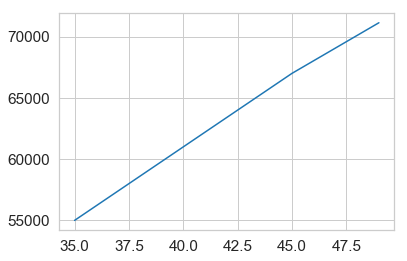

In [80]:
x = [x for x in range(35, 50)]
y = list(map(lambda r: -solvers.lp(c, G.T, matrix([r, 20, 80, 35, 25, 30, 50, 0, 0, 0], tc='d'), 
                                   solver='glpk')['primal objective'], 
             x))

sb.set_style("whitegrid")
sb.set_context('notebook',        # Варианты: paper, talk, poster
               font_scale=1.4)    # См. https://seaborn.pydata.org/tutorial/aesthetics.html

sb.lineplot(x, y)
